# Exam 1- Higgs ML Challenge

The HiggsML challenge was organized by ATLAS colleagues and ran on Kaggle's platform. The challenge provided a training and test set of Higgs and background events in CSV format. Using this data, participants were tasked with creating a classifier, which they submitted to Kaggle. Kaggle evaluated the classifier against another test set. At the end of the competition, the best performing classifiers were awarded a cash prize.

We will run a mini-competition, using the same data, as your first exam. Note that you will not need a Kaggle account, but may wish to get one to get more details.

The challenge is described in https://higgsml.lal.in2p3.fr

The Kaggle site is https://www.kaggle.com/c/higgs-boson

Detail description of the data and challenge: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

You are welcome to use Scikit or any other package you like.

Please separate different steps into different Jupyter Notebooks. For example:

    - Convert CSV to h5 format.
    - Load data and plot/compare variables.
    - Setup and Train the Classifier. Save the trained classifier (see http://scikit-learn.org/stable/modules/model_persistence.html )
    - Evaluate and compare different classifiers using ROC curves and metric defined by competition.

A copy of the data CSV files are on the cluster at: /data/afarbin/DLClass/HiggsML


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!ls /data/afarbin/DLClass/HiggsML

Exam 1.ipynb  test.csv	training.csv


Note that the first line of the file contains the variable names:

In [2]:
!head -2 /data/afarbin/DLClass/HiggsML/training.csv

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s


Some basic shell commands may help you. For example here is the number of lines (so N Events + variable names):

In [3]:
!wc -l /data/afarbin/DLClass/HiggsML/training.csv

250001 /data/afarbin/DLClass/HiggsML/training.csv


You can strip off the first line into a new file in your Exam directory:

In [4]:
!tail -25000 /data/afarbin/DLClass/HiggsML/training.csv > mytraining.csv #data to train the networks
#!awk -F'[{}]' '{print $1 $2}' mytraining.csv > finaltraining.csv
#!awk 'NF{NF-=1};1' < mytraining.csv > finaltraining.csv
#!cut -f1,32 < mytraining.csv > finaltraining.csv
#!cut -d, -f33 --complement mytraining.csv > training1.csv
#!cut -d, -f32 --complement training1.csv > finaltraining.csv
!head -25001 /data/afarbin/DLClass/HiggsML/training.csv > mytest1.csv #data to test the trained networks
!tail -25000 mytest1.csv > mytest.csv
!tail -250000 /data/afarbin/DLClass/HiggsML/training.csv > totaltraining.csv #total data without heading

In [5]:
!head -2 mytraining.csv
!head -2 mytest.csv
!head -2 totaltraining.csv

325000,-999.0,83.863,89.323,14.852,-999.0,-999.0,-999.0,2.193,14.852,92.155,0.642,-1.402,-999.0,56.112,-0.751,-2.935,36.043,-1.829,-1.027,68.9,0.973,171.752,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,4.33475402901,b
325001,-999.0,94.737,39.619,29.276,-999.0,-999.0,-999.0,1.609,29.276,55.051,1.658,-1.204,-999.0,20.712,0.027,-0.695,34.339,-0.548,-2.198,66.207,1.173,125.794,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,4.75719501339,b
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
100001,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.23358448717,b
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.2

In [6]:
filenameTraining = "mytraining.csv"  
TrainingNames = "EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label"
TrainingNames = TrainingNames.split(',')
    
filenameTest = "mytest.csv"    
TestNames = "EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label"
TestNames = TestNames.split(',')

filenameTotal = "totaltraining.csv"    
TotalNames = "EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label"
TotalNames = TotalNames.split(',')

In [7]:
dTr = pd.read_csv(filenameTraining, names=TrainingNames)
dTe = pd.read_csv(filenameTest, names=TestNames)
dTo = pd.read_csv(filenameTotal, names=TestNames)

In [8]:
dTr

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,325000,-999.000,83.863,89.323,14.852,-999.000,-999.000,-999.000,2.193,14.852,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.334754,b
1,325001,-999.000,94.737,39.619,29.276,-999.000,-999.000,-999.000,1.609,29.276,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.757195,b
2,325002,81.103,2.098,50.311,100.200,0.975,136.149,0.609,1.652,29.865,...,3,74.630,1.408,0.007,62.509,0.433,-1.986,184.927,0.064061,b
3,325003,59.615,70.272,47.524,124.623,-999.000,-999.000,-999.000,0.935,4.825,...,1,129.350,2.504,-2.587,-999.000,-999.000,-999.000,129.350,2.356486,b
4,325004,215.394,32.584,153.179,67.003,2.034,163.624,-0.792,3.745,25.024,...,2,57.384,1.510,1.226,50.355,-0.524,-2.716,107.739,2.956064,b
5,325005,83.436,35.536,59.594,49.834,0.275,270.931,0.257,2.244,57.698,...,3,143.132,0.662,-0.717,127.067,0.388,2.098,330.859,0.744056,b
6,325006,142.025,48.356,99.293,69.362,0.535,33.569,0.866,2.445,32.161,...,2,48.918,0.701,1.801,32.444,1.236,1.238,81.362,0.001503,s
7,325007,77.226,84.147,67.166,34.288,-999.000,-999.000,-999.000,2.150,2.994,...,1,36.211,-0.869,-0.786,-999.000,-999.000,-999.000,36.211,1.786843,b
8,325008,105.349,28.849,77.693,113.563,1.030,101.585,-0.263,1.428,29.314,...,2,86.010,0.473,-1.170,37.540,-0.556,0.369,123.551,1.373391,b
9,325009,108.877,1.394,74.439,3.598,-999.000,-999.000,-999.000,3.116,3.598,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.018636,s


In [9]:
dTe

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.296003,b
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s


In [10]:
dTo

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.296003,b
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s


In [11]:
ctrainsignal = dTr["Label"]
booltrainsignal = ctrainsignal == "s"
#trainweight = dTr["Weight"]
inttrainsignal = np.array(booltrainsignal, dtype = np.float64)
#I tried to weigh this in many ways, I don't even know if I had the right idea but no matter what I tried nothing worked
#trainweight = np.reshape(trainweight, (1,25000))
#Train_S_B = trainweight*inttrainsignal
#Train_S_B = np.reshape(Train_S_B, (1,25000))
#print inttrainsignal
#print trainweight

ctestsignal = dTe["Label"]
booltestsignal = ctestsignal == "s"
#testweight = dTe["Weight"]
inttestsignal = np.array(booltestsignal, dtype = np.float64)
#Test_S_B = testweight*inttestsignal
#Test_S_B = np.reshape(Test_S_B, (1,25000))

ctotalsignal = dTo["Label"]
booltotalsignal = ctotalsignal == "s"
#totalweight = dTo["Weight"]
inttotalsignal = np.array(booltotalsignal, dtype = np.float64)
#Total_S_B = totalweight*inttotalsignal
#Total_S_B = np.reshape(Total_S_B, (1,250000))

In [12]:
dTo_sig = dTo[dTo.Label == "s"]
dTo_sw = dTo_sig["Weight"]
dTo_bkg = dTo[dTo.Label == "b"]
dTo_bw = dTo_bkg["Weight"]

DER_mass_MMC


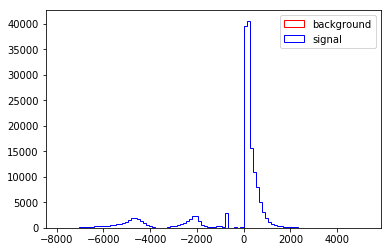

DER_mass_transverse_met_lep


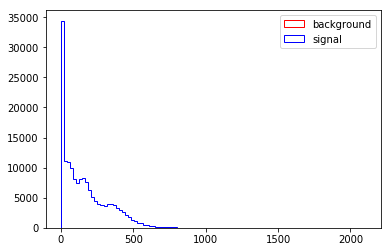

DER_mass_vis


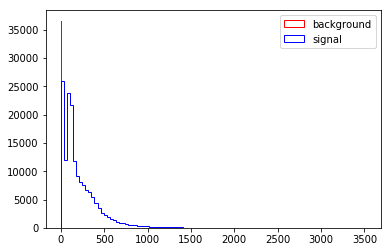

DER_pt_h


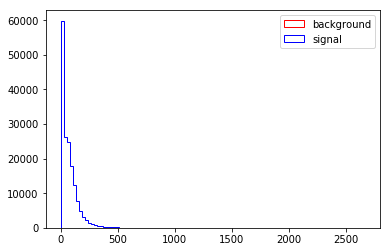

DER_deltaeta_jet_jet


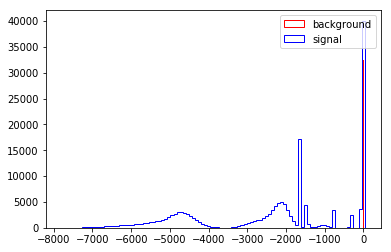

DER_mass_jet_jet


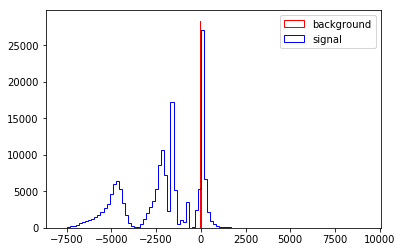

DER_prodeta_jet_jet


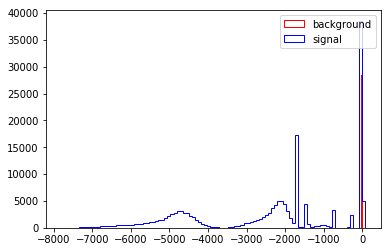

DER_deltar_tau_lep


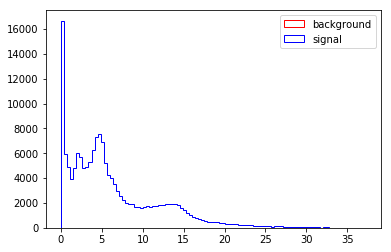

DER_pt_tot


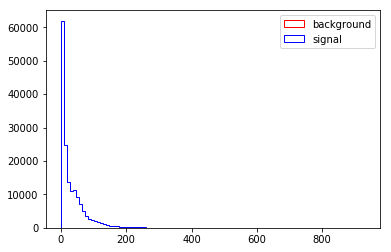

DER_sum_pt


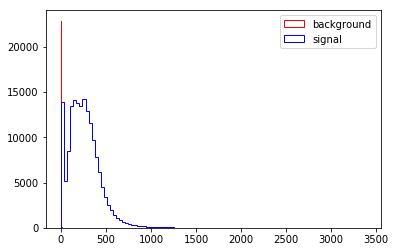

DER_pt_ratio_lep_tau


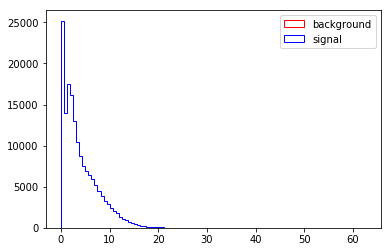

DER_met_phi_centrality


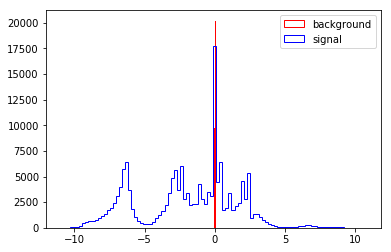

DER_lep_eta_centrality


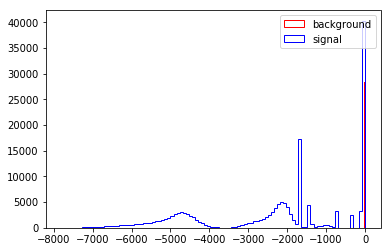

PRI_tau_pt


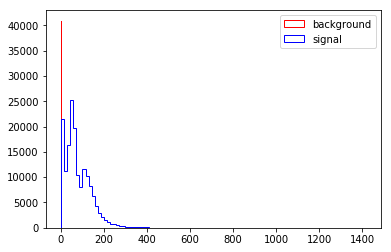

PRI_tau_eta


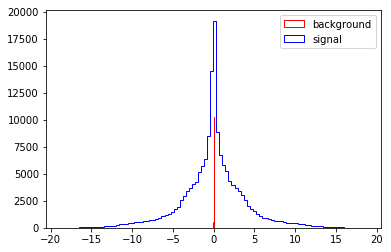

PRI_tau_phi


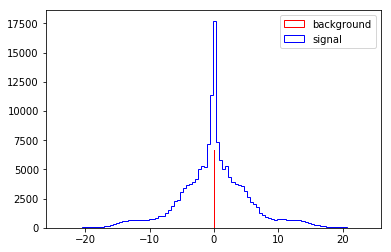

PRI_lep_pt


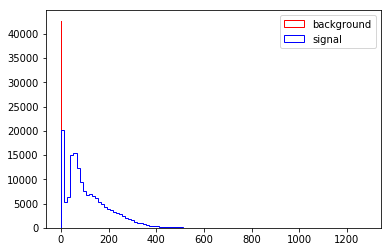

PRI_lep_eta


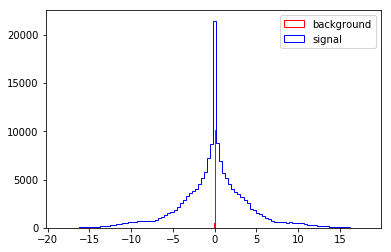

PRI_lep_phi


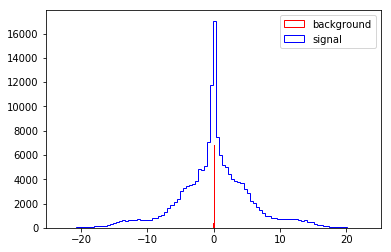

PRI_met


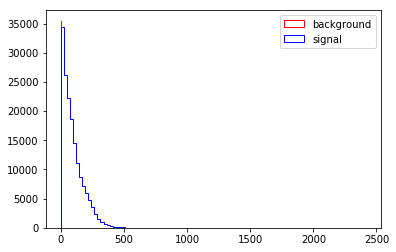

PRI_met_phi


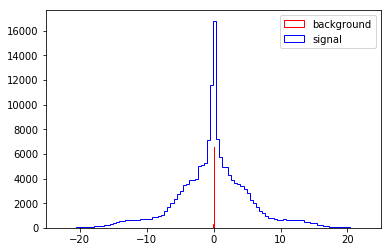

PRI_met_sumet


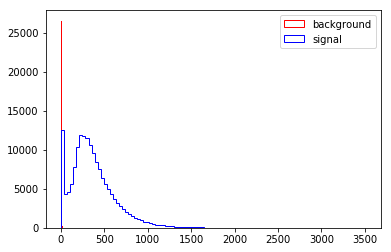

PRI_jet_num


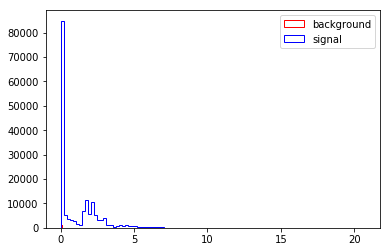

PRI_jet_leading_pt


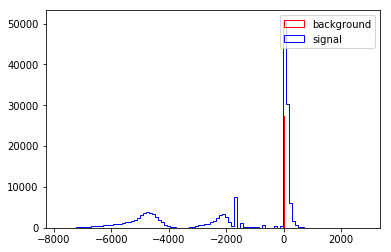

PRI_jet_leading_eta


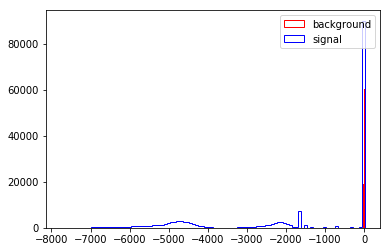

PRI_jet_leading_phi


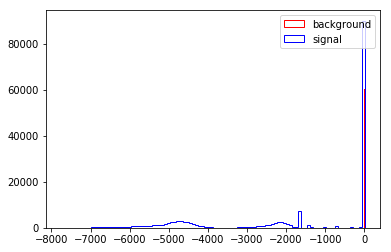

PRI_jet_subleading_pt


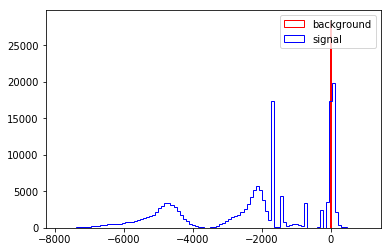

PRI_jet_subleading_eta


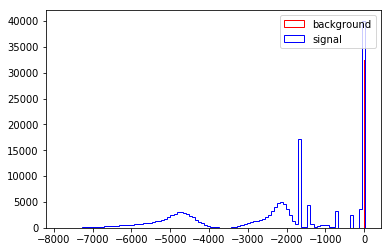

PRI_jet_subleading_phi


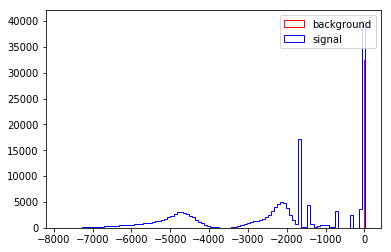

PRI_jet_all_pt


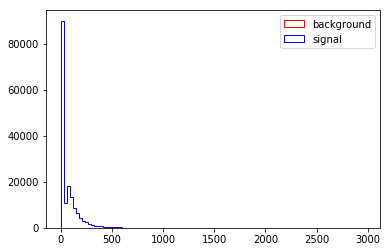

In [13]:
for name in TotalNames[1:31]:
    print name
    plt.figure()
    plt.hist(dTo_sig[name]*dTo_sw,bins=100,histtype="step", color="red",label="background",stacked=True)
    plt.hist(dTo_bkg[name]*dTo_bw,bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [14]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

In [15]:
X_Train=dTr[TrainingNames[1:31]]
#Normalizing the data for the Fisher and Decision Tree hurt their ROC curves
#X_Train = (X_Train+np.min(X_Train))/(np.max(X_Train)-np.min(X_Train)) #add min, divide by range
y_Train= inttrainsignal
#print X_Train
#print y_Train

X_Test=dTe[TestNames[1:31]]
#X_Test = (X_Test+np.min(X_Test))/(np.max(X_Test)-np.min(X_Test)) #add min, divide by range
y_Test= inttestsignal
#Trying to use my weighted signal would cause an error everytime
#Test_S_B
#print X_Test
#print y_Test

Test_sig=dTe[dTe.Label == "s"]
dTe_sw = Test_sig["Weight"]
Test_bkg=dTe[dTe.Label == "b"]
dTe_bw = Test_bkg["Weight"]

In [16]:
#I tied to weigh the data for the last part here, I have no idea if this is even the right way but when I would try it
#the code would not finish running even after waiting awhile
#for name in TotalNames[1:31]:
    #Test_sig[name] = dTe_sw*Test_sig[name]
    #Test_bkg = dTe_bw*Test_bkg[TestNames[1:31]]

In [17]:
Fisher.fit(X_Train,y_Train)

/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

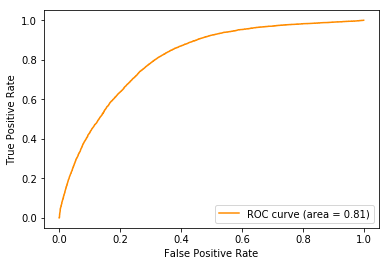

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

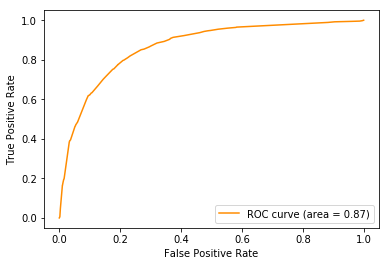

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
clf = tree.DecisionTreeRegressor(max_depth=7)
#7 is the lowest I could go without interferring with the optimum results

clf.fit(X_Train,y_Train)

fpr, tpr, _ = roc_curve(y_Test, clf.predict(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

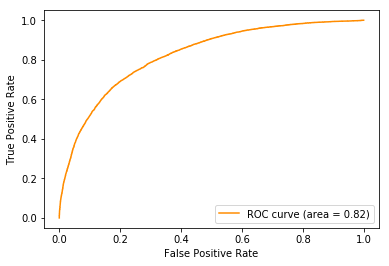

In [20]:
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor
clf = neural_network.MLPRegressor()

#I normalized the data from zero to one because doing that improved the MLPRegressor and the Neural Network
X_Train = (X_Train+np.min(X_Train))/(np.max(X_Train)-np.min(X_Train)) #add min, divide by range
X_Test = (X_Test+np.min(X_Test))/(np.max(X_Test)-np.min(X_Test)) #add min, divide by range
clf.fit(X_Train,y_Train)

fpr, tpr, _ = roc_curve(y_Test, clf.predict(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


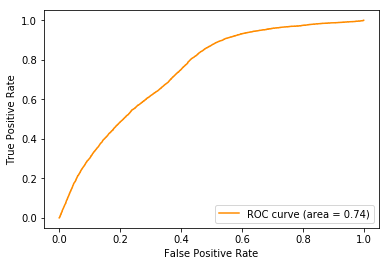

In [21]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
clf = linear_model.SGDRegressor()

clf.fit(X_Train,y_Train)

fpr, tpr, _ = roc_curve(y_Test, clf.predict(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

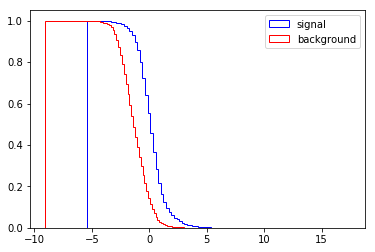

100


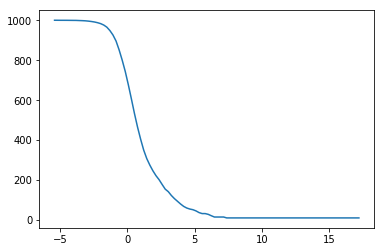

Max significance at  -5.39333952059  of 1000.00499997


(-5.3933395205916606, 1000.0049999663621, 0)

In [22]:
#put in the weights of the events for the curves and the next part
def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[TestNames[1:31]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[TestNames[1:31]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    #I also tried to weigh this data but when I tried what I thought was correct the program wouldn't finish running
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    #Input AMS formula from paper here
    significance = np.sqrt(2*(N_S*eff_sig+N_B*eff_bkg+10)*np.log(1+N_S*eff_sig/(N_B*eff_bkg+10))-N_S*eff_sig)

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)
